In [104]:
import os
import numpy as np
from io import BytesIO
from PIL import Image
import pandas as pd
from PIL import Image
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [97]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes (2).csv
Saving download.jpeg to download.jpeg
User uploaded file "diabetes.csv" with length 23873 bytes
User uploaded file "download.jpeg" with length 7721 bytes


In [85]:
df = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))
df = df.fillna(df.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['Outcome'], test_size=0.2, random_state=0)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [91]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

In [92]:
%%capture --no-display
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_trainscaled,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                    

In [93]:
print('Best params:',clf.best_params_)
print("Test: ", clf.score(X_testscaled,y_test))

Best params: {'activation': 'tanh', 'hidden_layer_sizes': (12,), 'solver': 'adam'}
Test:  0.8051948051948052


In [95]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import  load_files
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [103]:
from skimage import data
image = data.chelsea()

def color_quantization_k_means(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)



    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    
    # Display all results, alongside original image
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image ({n_colors} colors, K-Means)'  )
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

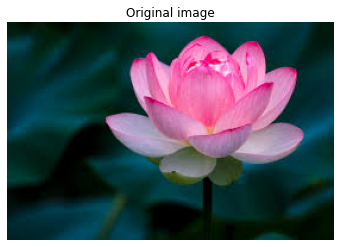

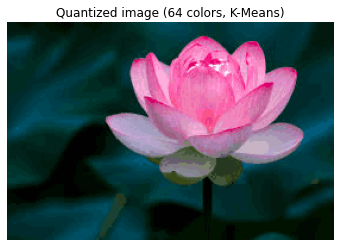

In [105]:
im = Image.open(BytesIO(uploaded['download.jpeg']))
color_quantization_k_means(im, n_colors=64)

In [106]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)
X.shape

(500, 2)

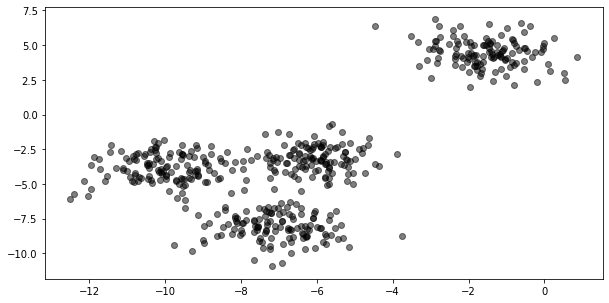

In [107]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [108]:
range_n_clusters = [6,7, 8]

For n_clusters = 6 The average silhouette_score is : 0.43902711183132426
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 8 The average silhouette_score is : 0.32799178719839805


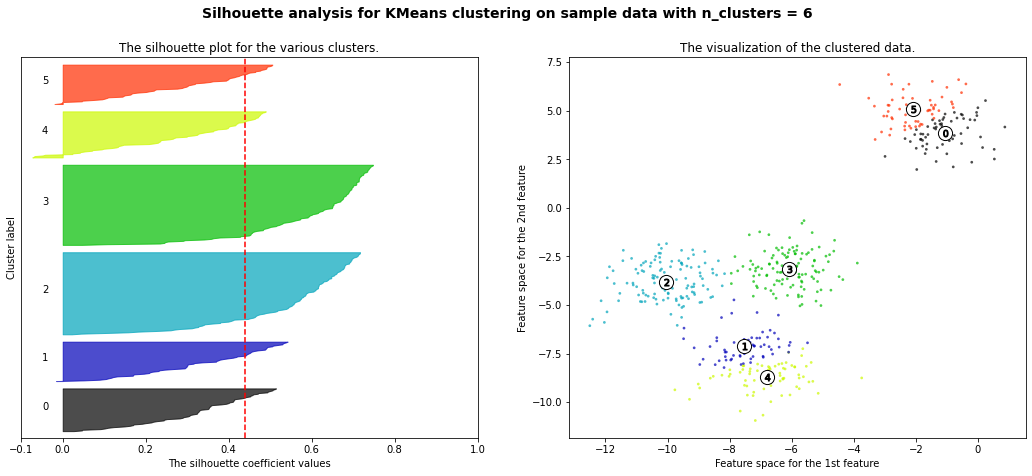

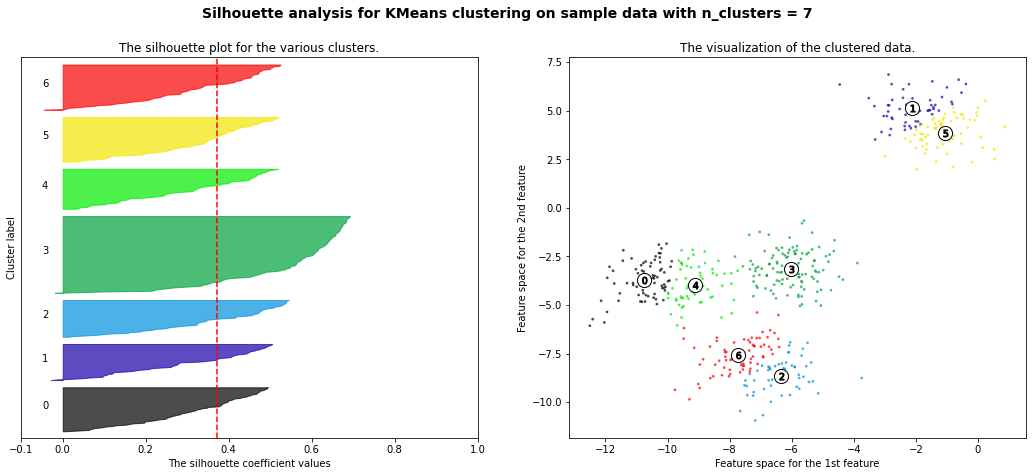

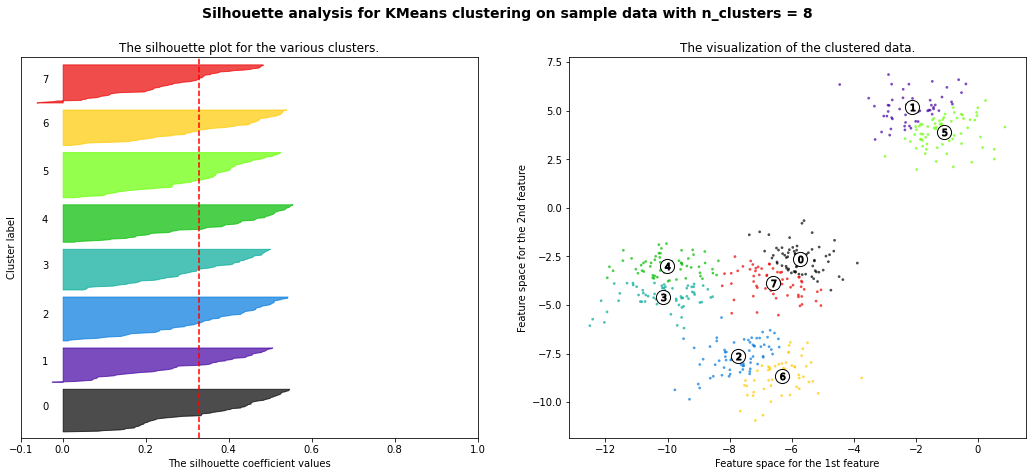

In [109]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [111]:
from numpy.random import multivariate_normal
mean1 = (2, 3)
cov1 = [[1, 0], [0, 1]]
X1 = multivariate_normal(mean1, cov1, 200)

mean2 = (5, 6)
cov2 = [[2, 0], [0, 2]]
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

In [115]:
df = df.fillna(df.mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


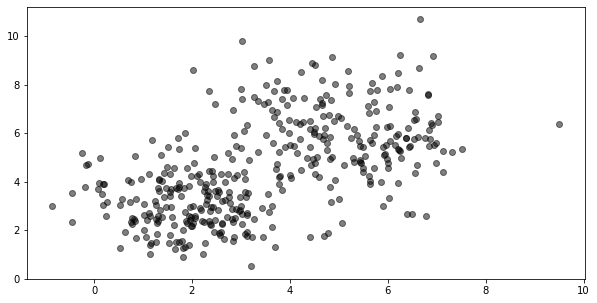

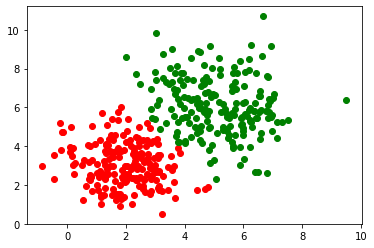

In [119]:
from sklearn.mixture import GaussianMixture

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)


predicted = clf.predict(X)
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=['red','green'][k])
plt.show()

In [122]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer( token_pattern=r'(?u)\b[a-zA-Z]\w+\b',
                              ngram_range=(1, 2),
                              stop_words='english' )
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape


from wordcloud import WordCloud,STOPWORDS

wc=WordCloud(width =1000, height=1000,stopwords=STOPWORDS)
text = ' '.join(count_vect.get_feature_names())

embed_code=wc.generate(text=text)

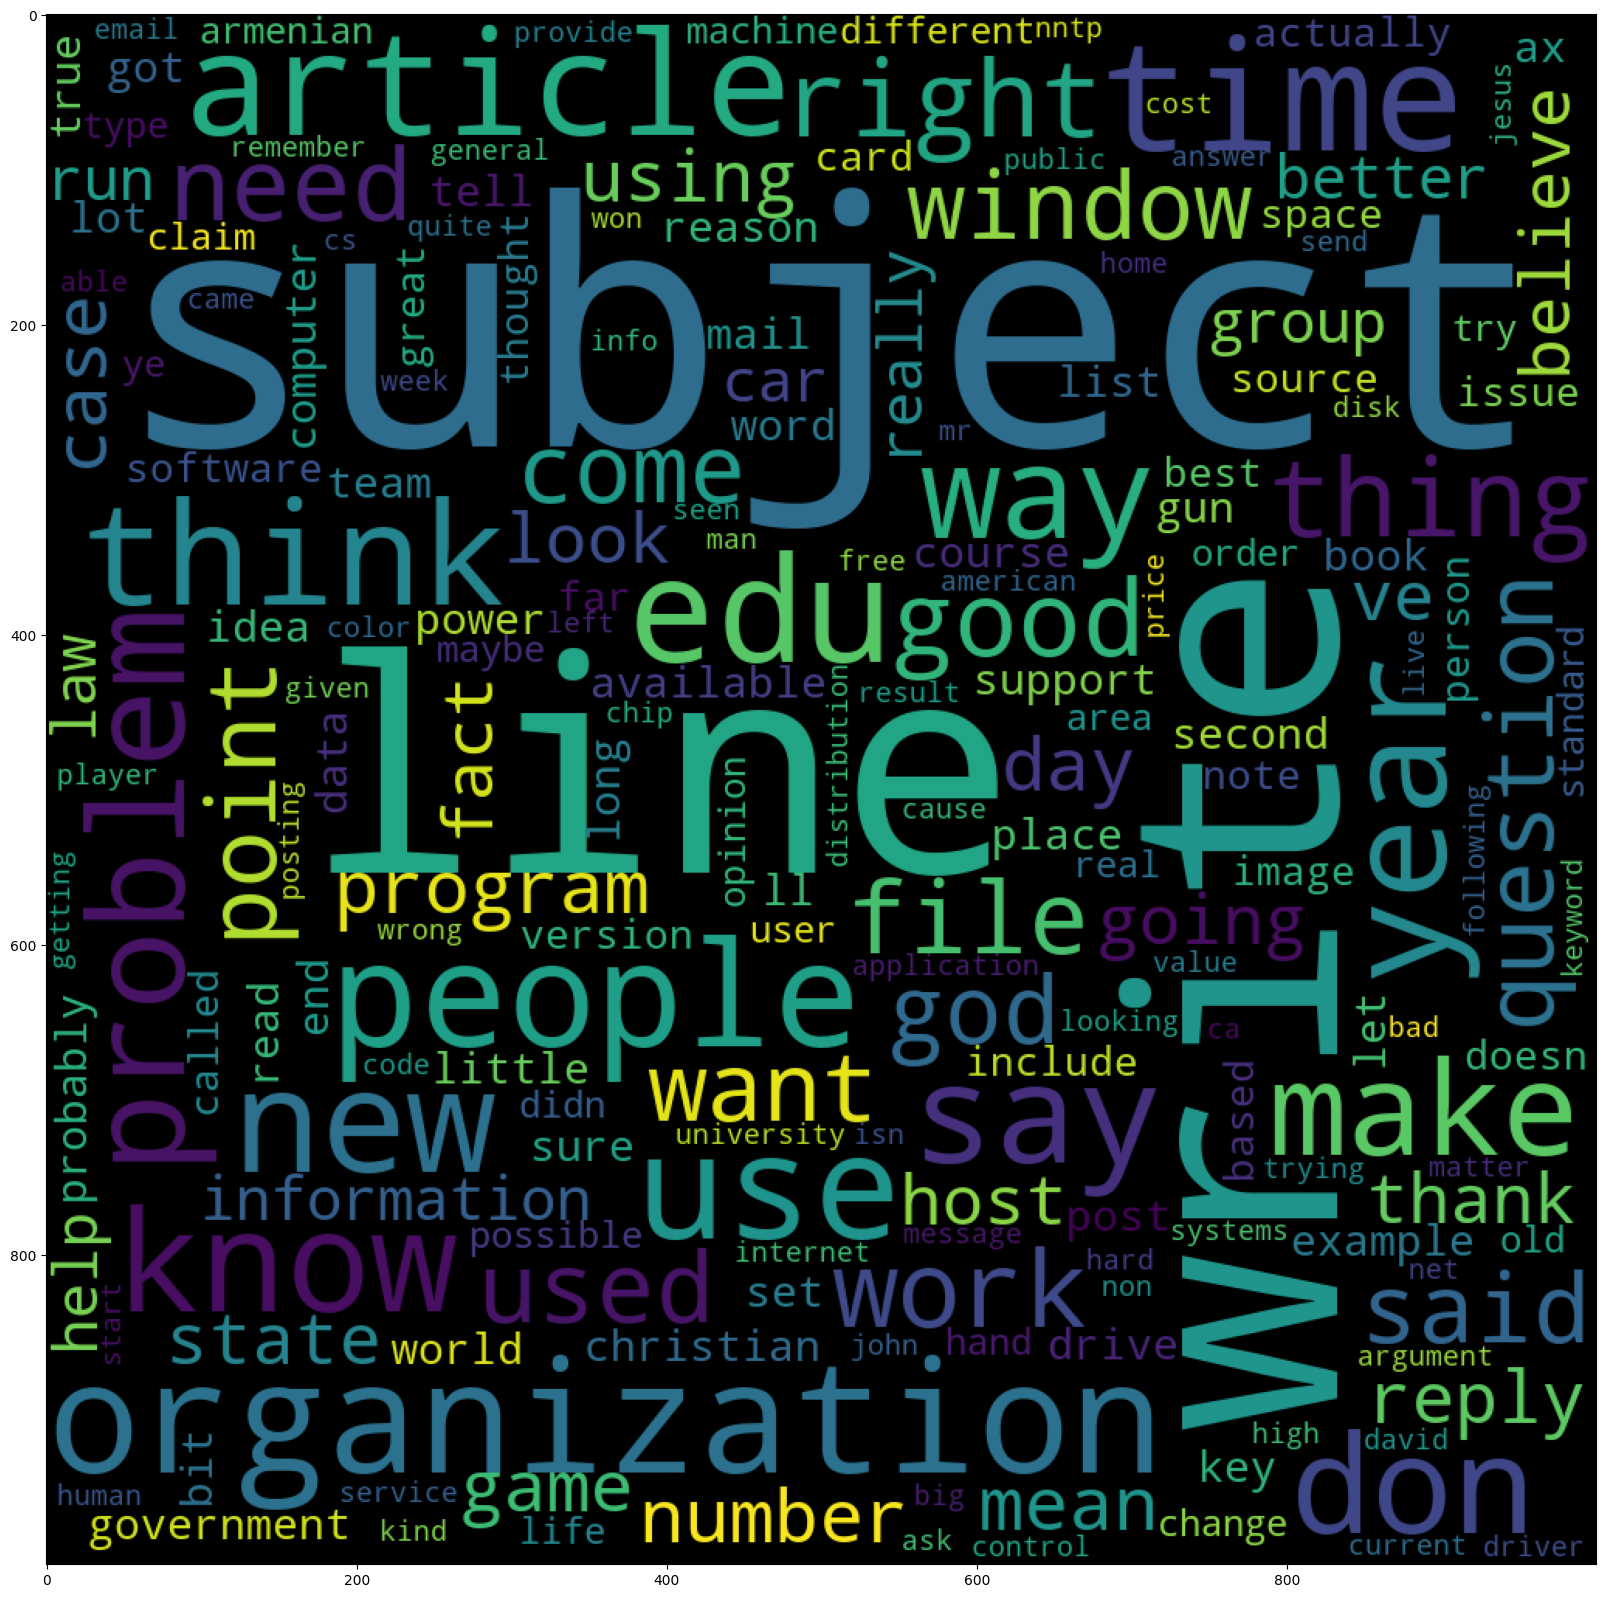

In [123]:
plt.figure(figsize=(20,45), dpi =100)
plt.imshow(embed_code)